In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


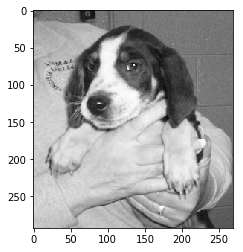

In [ ]:
DATADIR = "/content/drive/My Drive/PetImages"

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm



CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [ ]:
print(img_array)

[[122 111 105 ... 121 123 123]
 [126 117 115 ... 120 122 122]
 [122 114 114 ... 124 123 119]
 ...
 [190 189 197 ...  95  94  94]
 [188 188 191 ...  95  94  94]
 [190 190 191 ...  96  93  91]]


In [ ]:
print(img_array.shape)

(293, 269)


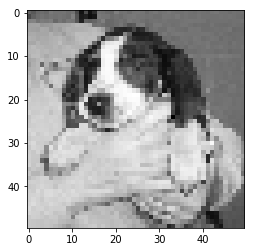

In [ ]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

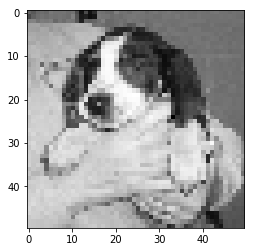

In [ ]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 1/1 [00:00<00:00, 227.69it/s]

1124


In [ ]:
import random

random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
0
0
0
0
0


In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[236]
   [236]
   [237]
   ...
   [197]
   [196]
   [193]]

  [[237]
   [237]
   [228]
   ...
   [200]
   [199]
   [197]]

  [[236]
   [238]
   [226]
   ...
   [203]
   [200]
   [200]]

  ...

  [[149]
   [144]
   [132]
   ...
   [133]
   [ 90]
   [116]]

  [[136]
   [144]
   [141]
   ...
   [ 67]
   [ 80]
   [127]]

  [[127]
   [122]
   [151]
   ...
   [ 38]
   [ 58]
   [ 93]]]]


In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
# Ensure TensorFlow 2.0 is installed.
!pip install -q tf-nightly-2.0-preview
# Load the TensorBoard notebook extension.
%load_ext tensorboard
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

NAME = "Cats-vs-dogs-CNN"

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

model.fit(X, y,
          batch_size=32,
          epochs=3,
          validation_split=0.3,
          callbacks=[tensorboard])

Train on 786 samples, validate on 338 samples
Epoch 1/3
786/786 [==============================] - 40s 51ms/sample - loss: 0.0294 - acc: 0.9593 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 2/3
786/786 [==============================] - 39s 50ms/sample - loss: 1.0000e-07 - acc: 1.0000 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 3/3
786/786 [==============================] - 40s 50ms/sample - loss: 1.0000e-07 - acc: 1.0000 - val_loss: 1.0000e-07 - val_acc: 1.0000


In [ ]:
%tensorboard --logdir logs